In [162]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_diabetes

#Load dataset
db = load_diabetes()
x = db.data
y = db.target

#Buat DataFrame
df = pd.DataFrame(x, columns=db.feature_names)
df['target'] = y  #Tambahkan target ke DataFrame



In [163]:
print(df.head(10))

        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   
5 -0.092695 -0.044642 -0.040696 -0.019442 -0.068991 -0.079288  0.041277   
6 -0.045472  0.050680 -0.047163 -0.015999 -0.040096 -0.024800  0.000779   
7  0.063504  0.050680 -0.001895  0.066629  0.090620  0.108914  0.022869   
8  0.041708  0.050680  0.061696 -0.040099 -0.013953  0.006202 -0.028674   
9 -0.070900 -0.044642  0.039062 -0.033213 -0.012577 -0.034508 -0.024993   

         s4        s5        s6  target  
0 -0.002592  0.019907 -0.017646   151.0  
1 -0.039493 -0.068332 -0.092204    75.0  
2 -0.002592  0.002861 -0.025930   141.0  
3  0.0

In [164]:
df.isnull().sum()

,0
age,0
sex,0
bmi,0
bp,0
s1,0
s2,0
s3,0
s4,0
s5,0
s6,0


In [165]:
#Statistik Dasar
print("Statistik Deskriptif Data:")
print(df.describe())  #Statistik dasar untuk setiap fitur

print("\n Korelasi antar fitur:")
print(df.corr())  #Korelasi antar fitur dengan target

print("\n Distribusi target:")
print(df['target'].describe())  #Statistik untuk target



Statistik Deskriptif Data:
                age           sex           bmi            bp            s1  \
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02   
mean  -2.511817e-19  1.230790e-17 -2.245564e-16 -4.797570e-17 -1.381499e-17   
std    4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02   
min   -1.072256e-01 -4.464164e-02 -9.027530e-02 -1.123988e-01 -1.267807e-01   
25%   -3.729927e-02 -4.464164e-02 -3.422907e-02 -3.665608e-02 -3.424784e-02   
50%    5.383060e-03 -4.464164e-02 -7.283766e-03 -5.670422e-03 -4.320866e-03   
75%    3.807591e-02  5.068012e-02  3.124802e-02  3.564379e-02  2.835801e-02   
max    1.107267e-01  5.068012e-02  1.705552e-01  1.320436e-01  1.539137e-01   

                 s2            s3            s4            s5            s6  \
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02   
mean   3.918434e-17 -5.777179e-18 -9.042540e-18  9.293722e-17  1.130318e-17   
std    4.761905e-02  4.7

In [166]:
print("Mean target value:", np.mean(y))


Mean target value: 152.13348416289594


In [167]:
#Ubah target menjadi kategori biner (Rendah/Tinggi (berdasarkan mean))
y_binary = (y > np.mean(y)).astype(int)
df['target_binary'] = y_binary

print("\n Jumlah sampel tiap kelas (Setelah binarisasi target):")
print(df['target_binary'].value_counts())  #Cek distribusi kelas



 Jumlah sampel tiap kelas (Setelah binarisasi target):
target_binary
0    247
1    195
Name: count, dtype: int64


In [168]:
print(df[['target', 'target_binary']].head(10))


   target  target_binary
0   151.0              0
1    75.0              0
2   141.0              0
3   206.0              1
4   135.0              0
5    97.0              0
6   138.0              0
7    63.0              0
8   110.0              0
9   310.0              1


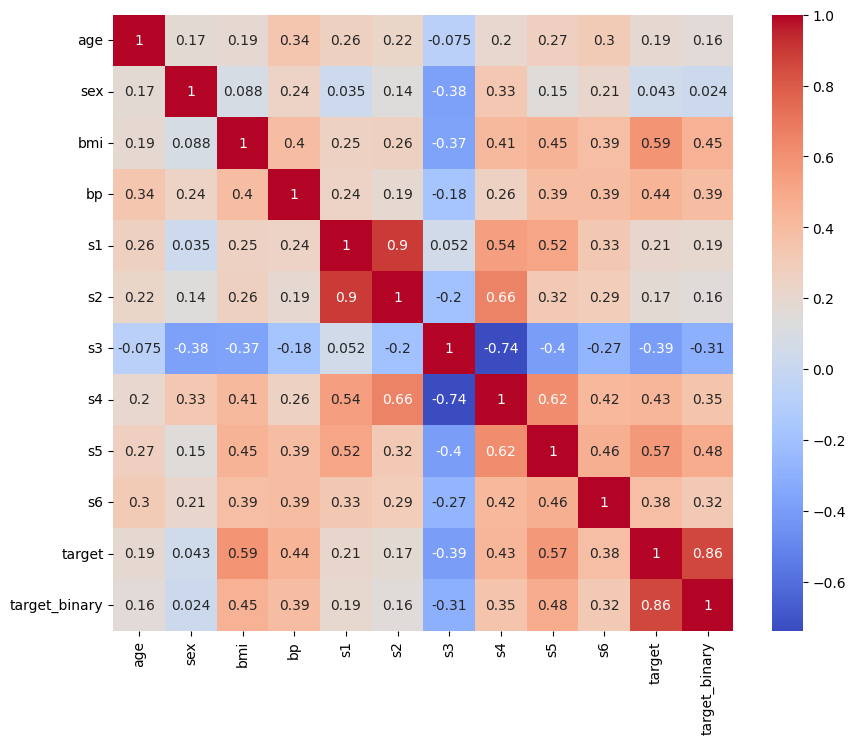

In [176]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()


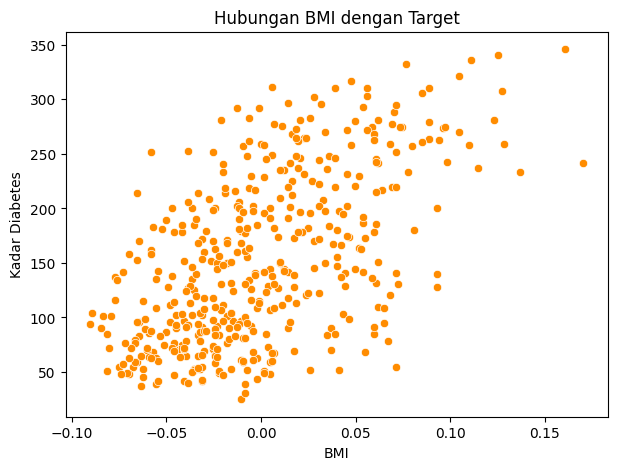

In [177]:
#Visualisasi korelasi BMI dengan Kadar Diabetes (Target)
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(7, 5))
sns.scatterplot(x=df["bmi"], y=df["target"], color="darkorange")
plt.title("Hubungan BMI dengan Target")
plt.xlabel("BMI")
plt.ylabel("Kadar Diabetes")
plt.show()


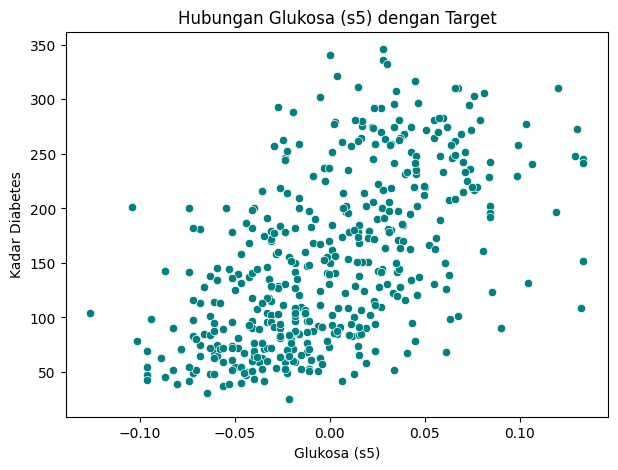

In [181]:
#Visualisasi kolerasi kadar glukosa dengan kadar diabetes (target)
plt.figure(figsize=(7, 5))
sns.scatterplot(x=df["s5"], y=df["target"], color="teal")
plt.title("Hubungan Glukosa (s5) dengan Target")
plt.xlabel("Glukosa (s5)")
plt.ylabel("Kadar Diabetes")
plt.show()


In [171]:
from sklearn.model_selection import train_test_split

#Split data (80% train, 20% test)
x_train, x_test, y_train, y_test = train_test_split(x, y_class, test_size=0.2, random_state=42, stratify=y_class)

#Cek jumlah data per kelas setelah split
print(pd.Series(y_train).value_counts())
print(pd.Series(y_test).value_counts())


1    177
0    176
Name: count, dtype: int64
0    45
1    44
Name: count, dtype: int64


In [172]:
from imblearn.over_sampling import SMOTE  # Import SMOTE
smote = SMOTE(random_state=42)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)

# Cek distribusi kelas setelah SMOTE
print(pd.Series(y_train_resampled).value_counts())

1    177
0    177
Name: count, dtype: int64


In [173]:
logreg_resampled = LogisticRegression(random_state=42, max_iter=1000)
logreg_resampled.fit(x_train_resampled, y_train_resampled)

# Prediksi ulang
y_pred_resampled = logreg_resampled.predict(x_test)

from sklearn.metrics import accuracy_score, classification_report

# Evaluasi akurasi
accuracy_resampled = accuracy_score(y_test, y_pred_resampled)
print(f"Accuracy after resampling: {accuracy_resampled:.4f}")

# Laporan klasifikasi
print(classification_report(y_test, y_pred_resampled))


Accuracy after resampling: 0.7753
              precision    recall  f1-score   support

           0       0.80      0.73      0.77        45
           1       0.75      0.82      0.78        44

    accuracy                           0.78        89
   macro avg       0.78      0.78      0.78        89
weighted avg       0.78      0.78      0.77        89



In [174]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

#Inisiasi model
model = LogisticRegression(class_weight='balanced', random_state=42, max_iter=1000)

#Latih model di data training
model.fit(x_train, y_train)

#prediksi di data testing
y_pred = model.predict (x_test)

#Evaluaasi model:mengukur akurasi model
accuracy = accuracy_score (y_test, y_pred)
print (f"Accuracy :{accuracy:.4f}")

#laporan klasifikasi
print(classification_report(y_test, y_pred ))

Accuracy :0.7753
              precision    recall  f1-score   support

           0       0.80      0.73      0.77        45
           1       0.75      0.82      0.78        44

    accuracy                           0.78        89
   macro avg       0.78      0.78      0.78        89
weighted avg       0.78      0.78      0.77        89



In [175]:
from sklearn.ensemble import RandomForestClassifier

#inisiasi model rf
rf_model = RandomForestClassifier(random_state= 42, n_estimators =100)

#Latih model di data train
rf_model.fit (x_train, y_train)

#prediksi data testing
y_pred_rf = rf_model.predict (x_test)

#evaluasi
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy Random Forest :{accuracy_rf:.4f}")

#laporan
print(classification_report(y_test, y_pred_rf))


Accuracy Random Forest :0.7640
              precision    recall  f1-score   support

           0       0.82      0.69      0.75        45
           1       0.73      0.84      0.78        44

    accuracy                           0.76        89
   macro avg       0.77      0.76      0.76        89
weighted avg       0.77      0.76      0.76        89

